In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

(ts2,x1) =  ( 0.0 , 0.0 )
(ts2,x2) =  ( 0.0 , 0.0 )
(ts3,x1) =  ( 0.6 , 2.26 )
(ts3,x2) =  ( 0.6 , 2.38 )
(ts4,x1) =  ( 0.8 , 2.56 )
(ts4,x2) =  ( 0.8 , 2.75 )
(ts5,x1) =  ( 1.8 , 2.82 )
(ts5,x2) =  ( 1.8 , 3.39 )
(ts6,x1) =  ( 7.31 , 1.36 )
(ts6,x2) =  ( 7.31 , 6.05 )
(ts7,x1) =  ( 8.54 , 0.37 )
(ts7,x2) =  ( 8.54 , 1.65 )
(ts8,x1) =  ( 8.83 , 1.62 )
(ts8,x2) =  ( 8.83 , 2.78 )
(ts9,x1) =  ( 10.11 , 2.94 )
(ts9,x2) =  ( 10.11 , 3.73 )
(ts10,x1) =  ( 13.59 , 4.72 )
(ts10,x2) =  ( 13.59 , 2.29 )
(ts11,x1) =  ( 17.71 , 7.05 )
(ts11,x2) =  ( 17.71 , 1.35 )
(ts12,x1) =  ( 19.36 , 7.26 )
(ts12,x2) =  ( 19.36 , 1.29 )


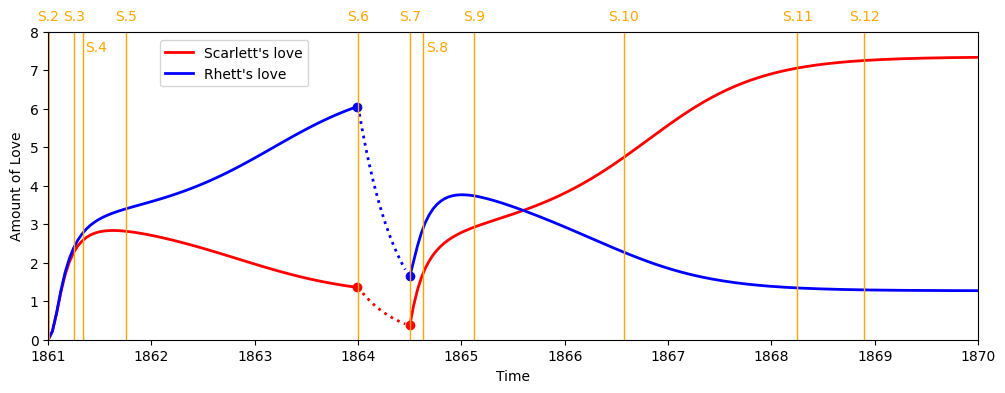

In [2]:
# Set the size of the figure (adjust width and height as needed)
plt.figure(figsize=(12, 4))
# Set x-axis ticks at 10 intervals
t_total = 22
num_intervals = 9
# tick_positions = np.linspace(0, t_total, num_intervals + 1)
# plt.xticks(tick_positions)
# plt.xlim(0, t_total)
# plt.ylim(0, 8)

# Calculate the years corresponding to each tick position
years = np.linspace(1861, 1870, num_intervals + 1)

# Set the tick positions and labels
tick_positions = np.linspace(0, t_total, num_intervals + 1)
tick_labels = [str(int(year)) for year in years]

# Plotting
plt.xticks(tick_positions, tick_labels)
plt.xlim(0, t_total)
plt.ylim(0, 8)

# Set parameter values old model
alpha1, alpha2 = 1, 1
phi1, phi2 = 1, 1
k1, beta1, k2, beta2 = 15, 1, 15, 1
lambda12, lambda22, lambda11, lambda21, lambda31, lambda41 = 1, 0, 1, 0, 0, 0
A11, A21, A12, A22, A32, A42 = 1.2, 0, 1, 0, 0, 0
A1 = lambda12 * A11 + lambda22 * A21
A2 = lambda11 * A12 + lambda21 * A22 + lambda31 * A32 + lambda41 * A42

# Define the functions for the terms
R1 = lambda x2: k1 * x2 * np.exp(-x2 / beta1)
R2 = lambda x1: k2 * x1 * np.exp(-x1 / beta2)

# Define the ODE system
def ode_system(x, t):
    return [-alpha1 * x[0] + phi1 * A2 + R1(x[1]),
            -alpha2 * x[1] + phi2 * A1 + R2(x[0])]

# Define time span
tspan = np.linspace(0, 100, 1000)

# Define initial conditions for both ODEs
initial_conditions = [0, 0]

# Solve the ODE system
sol = odeint(ode_system, initial_conditions, tspan)

# Find the index corresponding to t = 8.67 in tspan
ts6 = t_total/3
common_constant_idx = np.argmin(np.abs(tspan - ts6))
# Retrieve the y-value at the found index
y_value_at_s6 = sol[common_constant_idx]

# Plot the solutions up to the common constant values
plt.plot(tspan[:common_constant_idx], sol[:common_constant_idx, 0], label="Scarlett's love", linewidth=2, color='red')
plt.plot(tspan[:common_constant_idx], sol[:common_constant_idx, 1], label="Rhett's love", linewidth=2, color ='blue')

# Plot the last points of the part 1
plt.scatter(tspan[common_constant_idx], sol[common_constant_idx, 0], color='red', marker='o')
plt.scatter(tspan[common_constant_idx], sol[common_constant_idx, 1], color='blue', marker='o')

# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #

# Define the middle differential equation of S's love
def ode_m_x1(x, t):
    return [ -alpha1 * x[0], -alpha2 * x[1]]

# Initial value of x1 at t = tspan[:common_constant_idx]
initial_value_m = [y_value_at_s6[0], y_value_at_s6[1]]
# Create the time array
tspan_m = np.linspace(ts6, 100, 1000)
# Solve the ode_m_x1
sol_m = odeint(ode_m_x1, initial_value_m, tspan)

# Find the index corresponding to t = ts7 in tspan
ts7 = t_total/9 * 3.5
common_idx_s7 = np.argmin(np.abs(tspan_m - ts7))
# Retrieve the y-value at the found index
y_value_at_s7 = sol_m[common_idx_s7]

# Plot the solutions up to the common_idx_s7
plt.plot(tspan_m[:common_idx_s7], sol_m[:common_idx_s7, 0], label="Scarlett's love", linewidth=2, color='red', linestyle = 'dotted')
plt.plot(tspan_m[:common_idx_s7], sol_m[:common_idx_s7, 1], label="Rhett's love", linewidth=2, color ='blue', linestyle = 'dotted')

# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #
# Set new coefficients for the second part
A12_new = 2
A2_new = lambda11 * A12_new + lambda21 * A22 + lambda31 * A32 + lambda41 * A42
def ode_system_2(x, t):
    return [-alpha1 * x[0] + phi1 * A2_new + R1(x[1]),
            -alpha2 * x[1] + phi2 * A1 + R2(x[0])]

# Define time span for the second part starting from t=10
tspan2 = np.linspace(ts7, 100, 1000)

# Define initial conditions for the second part
initial_conditions2 = [y_value_at_s7[0], y_value_at_s7[1]]  # New initial conditions


# Solve the ODE system for the second part
sol2 = odeint(ode_system_2, initial_conditions2, tspan2)

# Find the index where both values become constant simultaneously for the second part
tol_2 = 0.0001
common_constant_idx2 = next((i for i in range(1, len(tspan2)) if np.allclose(sol2[i, :], sol2[i-1, :], atol=tol_2)), len(tspan2))

# Plot the solutions for the second part
plt.plot(tspan2[:common_constant_idx2], sol2[:common_constant_idx2, 0],  linewidth=2, label="Scarlett's love", color='red')
plt.plot(tspan2[:common_constant_idx2], sol2[:common_constant_idx2, 1],  linewidth=2, label="Rhett's love", color ='blue')

# Plot the initial points of the part 2
plt.scatter(tspan2[0], sol2[0, 0], color='red', marker='o')
plt.scatter(tspan2[0], sol2[0, 1], color='blue', marker='o')


# =============================================================================================================== #

# Add scenes points
fontsize_pts = 10

# S1-S6 Use tspan and sol
# Plot t = S.2
ts2 = 0
plt.axvline(x = ts2, color='orange', linewidth=2, label='S.2')
plt.text(ts2, 1.05, 'S.2', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = 0 in tspan
common_idx_s2 = np.argmin(np.abs(tspan - ts2))
# Print the result
print('(ts2,x1) = ', '(', tspan[common_idx_s2], ',', sol[common_idx_s2, 0], ')')
print('(ts2,x2) = ', '(', tspan[common_idx_s2], ',', sol[common_idx_s2, 1], ')')

# Plot t = S.3
ts3 = t_total/9/4 + ts2
plt.axvline(x = ts3 , color='orange', linewidth=1, label = 'S.3')
plt.text(ts3/t_total, 1.05, 'S.3', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.3 in tspan
common_idx_s3 = np.argmin(np.abs(tspan - ts3))
# Print the result
print('(ts3,x1) = ', '(', round(tspan[common_idx_s3],2), ',', round(sol[common_idx_s3, 0],2), ')')
print('(ts3,x2) = ', '(', round(tspan[common_idx_s3],2), ',', round(sol[common_idx_s3, 1],2), ')')

# Plot t = S.4
ts4 = 3*t_total/9/9 + ts2
plt.axvline(x = ts4 , color='orange', linewidth=1, label = 'S.4')
plt.text(ts4/t_total+0.015, 0.95, 'S.4', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.3 in tspan
common_idx_s4 = np.argmin(np.abs(tspan - ts4))
# Print the result
print('(ts4,x1) = ', '(', round(tspan[common_idx_s4],2), ',', round(sol[common_idx_s4, 0],2), ')')
print('(ts4,x2) = ', '(', round(tspan[common_idx_s4],2), ',', round(sol[common_idx_s4, 1],2), ')')

# Plot t = S.5
ts5 = 3*t_total/9/4 + ts2
plt.axvline(x = ts5 , color='orange', linewidth=1, label = 'S.5')
plt.text(ts5/t_total, 1.05, 'S.5', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.3 in tspan
common_idx_s5 = np.argmin(np.abs(tspan - ts5))
# Print the result
print('(ts5,x1) = ', '(', round(tspan[common_idx_s5],2), ',', round(sol[common_idx_s5, 0],2), ')')
print('(ts5,x2) = ', '(', round(tspan[common_idx_s5],2), ',', round(sol[common_idx_s5, 1],2), ')')

# Plot t = S.6
ts6 = 3*t_total/9 + ts2
plt.axvline(x = ts6 , color='orange', linewidth=1, label = 'S.6')
plt.text(ts6/t_total, 1.05, 'S.6', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.6 in tspan
common_idx_s6 = np.argmin(np.abs(tspan - ts6))
print('(ts6,x1) = ', '(', round(tspan[common_idx_s6],2), ',', round(sol[common_idx_s6, 0],2), ')')
print('(ts6,x2) = ', '(', round(tspan[common_idx_s6],2), ',', round(sol[common_idx_s6, 1],2), ')')

# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #
# S7-S12 Use tspan2/tspan_m and sol2/sol_m
# Plot t = S.7
plt.axvline(x = ts7 , color='orange', linewidth=1, label = 'S.7')
plt.text(ts7/t_total, 1.05, 'S.7', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
print('(ts7,x1) = ', '(', round(tspan_m[common_idx_s7],2), ',', round(sol_m[common_idx_s7, 0],2), ')')
print('(ts7,x2) = ', '(', round(tspan_m[common_idx_s7],2), ',', round(sol_m[common_idx_s7, 1],2), ')')

# Plot t = S.8
ts8 = 1*t_total/9/2/4 + ts7
plt.axvline(x = ts8 , color='orange', linewidth=1, label = 'S.8')
plt.text(ts8/t_total+0.015, 0.95, 'S.8', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.8 in tspan
common_idx_s8 = np.argmin(np.abs(tspan2 - ts8))
# Print the result
print('(ts8,x1) = ', '(', round(tspan2[common_idx_s8],2), ',', round(sol2[common_idx_s8, 0],2), ')')
print('(ts8,x2) = ', '(', round(tspan2[common_idx_s8],2), ',', round(sol2[common_idx_s8, 1],2), ')')

# Plot t = S.9
ts9 = t_total/8/9 + t_total/18 + ts7
plt.axvline(x = ts9 , color='orange', linewidth=1, label = 'S.9')
plt.text(ts9/t_total, 1.05, 'S.9', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.9 in tspan
common_idx_s9 = np.argmin(np.abs(tspan2 - ts9))
# Print the result
print('(ts9,x1) = ', '(', round(tspan2[common_idx_s9],2), ',', round(sol2[common_idx_s9, 0],2), ')')
print('(ts9,x2) = ', '(', round(tspan2[common_idx_s9],2), ',', round(sol2[common_idx_s9, 1],2), ')')

# Plot t = S.10
ts10 = 0.57*t_total/9 + t_total/9 + t_total/18 + ts7
plt.axvline(x = ts10 , color='orange', linewidth=1, label = 'S.10')
plt.text(ts10/t_total, 1.05, 'S.10', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.10 in tspan
common_idx_s10 = np.argmin(np.abs(tspan2 - ts10))
# Print the result
print('(ts10,x1) = ', '(', round(tspan2[common_idx_s10],2), ',', round(sol2[common_idx_s10, 0],2), ')')
print('(ts10,x2) = ', '(', round(tspan2[common_idx_s10],2), ',', round(sol2[common_idx_s10, 1],2), ')')

# Plot t = S.11
ts11 = t_total/9/4 + 3*t_total/9 + t_total/18 + ts7
plt.axvline(x = ts11 , color='orange', linewidth=1, label = 'S.11')
plt.text(ts11/t_total, 1.05, 'S.11', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.11 in tspan
common_idx_s11 = np.argmin(np.abs(tspan2 - ts11))
# Print the result
print('(ts11,x1) = ', '(', round(tspan2[common_idx_s11],2), ',', round(sol2[common_idx_s11, 0],2), ')')
print('(ts11,x2) = ', '(', round(tspan2[common_idx_s11],2), ',', round(sol2[common_idx_s11, 1],2), ')')

# Plot t = S.12
ts12 = 9*t_total/9/10 + 3*t_total/9 + t_total/18 + ts7
plt.axvline(x = ts12 , color='orange', linewidth=1, label = 'S.12')
plt.text(ts12/t_total, 1.05, 'S.12', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.11 in tspan
common_idx_s12 = np.argmin(np.abs(tspan2 - ts12))
# Print the result
print('(ts12,x1) = ', '(', round(tspan2[common_idx_s12],2), ',', round(sol2[common_idx_s12, 0],2), ')')
print('(ts12,x2) = ', '(', round(tspan2[common_idx_s12],2), ',', round(sol2[common_idx_s12, 1],2), ')')

# =============================================================================================================== #

# #Change x axis label
# years = np.arange(1861, 1871, 1)
# plt.xticks(np.linspace(0, t_total, len(years)), years.astype(int))

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Amount of Love')
# plt.title('Love Evolution Over Time')
plt.legend(["Scarlett's love", "Rhett's love"], bbox_to_anchor=(0.2, 0.8))
plt.show()

(ts2,x1) =  ( 0.0 , 0.0 )
(ts2,x2) =  ( 0.0 , 0.0 )
(ts3,x1) =  ( 0.6 , 2.26 )
(ts3,x2) =  ( 0.6 , 2.38 )
(ts4,x1) =  ( 0.8 , 2.56 )
(ts4,x2) =  ( 0.8 , 2.75 )
(ts5,x1) =  ( 1.8 , 2.82 )
(ts5,x2) =  ( 1.8 , 3.39 )
(ts6,x1) =  ( 7.31 , 1.36 )
(ts6,x2) =  ( 7.31 , 6.05 )
(ts6.5,x1) =  ( 7.61 , 1.01 )
(ts6.5,x2) =  ( 7.61 , 4.48 )
(ts7,x1) =  ( 8.54 , 0.37 )
(ts7,x2) =  ( 8.54 , 1.65 )
(ts8,x1) =  ( 8.83 , 1.62 )
(ts8,x2) =  ( 8.83 , 2.78 )
(ts9,x1) =  ( 10.11 , 2.94 )
(ts9,x2) =  ( 10.11 , 3.73 )
(ts10,x1) =  ( 13.59 , 4.72 )
(ts10,x2) =  ( 13.59 , 2.29 )
(ts11,x1) =  ( 17.71 , 7.05 )
(ts11,x2) =  ( 17.71 , 1.35 )
(ts12,x1) =  ( 19.36 , 7.26 )
(ts12,x2) =  ( 19.36 , 1.29 )


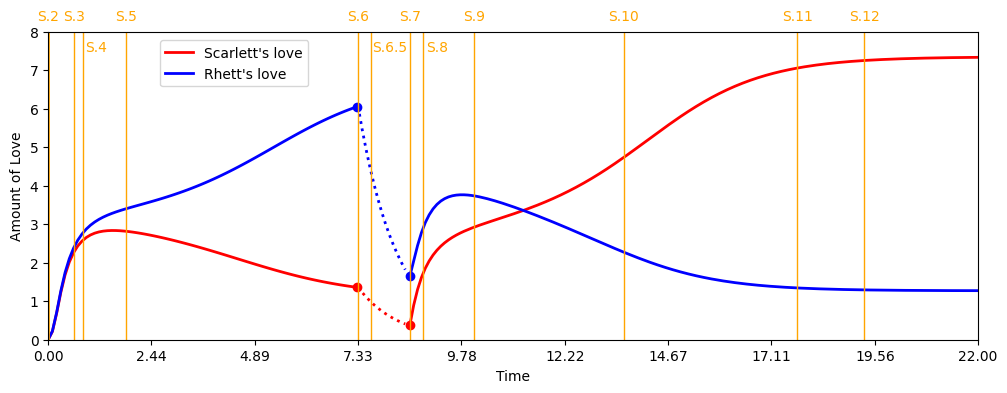

In [3]:
# Set the size of the figure (adjust width and height as needed)
plt.figure(figsize=(12, 4))
# Set x-axis ticks at 10 intervals
t_total = 22
num_intervals = 9
tick_positions = np.linspace(0, t_total, num_intervals + 1)
plt.xticks(tick_positions)
plt.xlim(0, t_total)
plt.ylim(0, 8)

# Set parameter values old model
alpha1, alpha2 = 1, 1
phi1, phi2 = 1, 1
k1, beta1, k2, beta2 = 15, 1, 15, 1
lambda12, lambda22, lambda11, lambda21, lambda31, lambda41 = 1, 0, 1, 0, 0, 0
A11, A21, A12, A22, A32, A42 = 1.2, 0, 1, 0, 0, 0
A1 = lambda12 * A11 + lambda22 * A21
A2 = lambda11 * A12 + lambda21 * A22 + lambda31 * A32 + lambda41 * A42

# Define the functions for the terms
R1 = lambda x2: k1 * x2 * np.exp(-x2 / beta1)
R2 = lambda x1: k2 * x1 * np.exp(-x1 / beta2)

# Define the ODE system
def ode_system(x, t):
    return [-alpha1 * x[0] + phi1 * A2 + R1(x[1]),
            -alpha2 * x[1] + phi2 * A1 + R2(x[0])]

# Define time span
tspan = np.linspace(0, 100, 1000)

# Define initial conditions for both ODEs
initial_conditions = [0, 0]

# Solve the ODE system
sol = odeint(ode_system, initial_conditions, tspan)

# Find the index corresponding to t = 8.67 in tspan
ts6 = t_total/3
common_constant_idx = np.argmin(np.abs(tspan - ts6))
# Retrieve the y-value at the found index
y_value_at_s6 = sol[common_constant_idx]

# Plot the solutions up to the common constant values
plt.plot(tspan[:common_constant_idx], sol[:common_constant_idx, 0], label="Scarlett's love", linewidth=2, color='red')
plt.plot(tspan[:common_constant_idx], sol[:common_constant_idx, 1], label="Rhett's love", linewidth=2, color ='blue')

# Plot the last points of the part 1
plt.scatter(tspan[common_constant_idx], sol[common_constant_idx, 0], color='red', marker='o')
plt.scatter(tspan[common_constant_idx], sol[common_constant_idx, 1], color='blue', marker='o')

# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #

# Define the middle differential equation of S's love
def ode_m_x1(x, t):
    return [ -alpha1 * x[0], -alpha2 * x[1]]

# Initial value of x1 at t = tspan[:common_constant_idx]
initial_value_m = [y_value_at_s6[0], y_value_at_s6[1]]
# Create the time array
tspan_m = np.linspace(ts6, 100, 1000)
# Solve the ode_m_x1
sol_m = odeint(ode_m_x1, initial_value_m, tspan)

# Find the index corresponding to t = ts7 in tspan
ts7 = t_total/9 * 3.5
common_idx_s7 = np.argmin(np.abs(tspan_m - ts7))
# Retrieve the y-value at the found index
y_value_at_s7 = sol_m[common_idx_s7]

# Plot the solutions up to the common_idx_s7
plt.plot(tspan_m[:common_idx_s7], sol_m[:common_idx_s7, 0], label="Scarlett's love", linewidth=2, color='red', linestyle = 'dotted')
plt.plot(tspan_m[:common_idx_s7], sol_m[:common_idx_s7, 1], label="Rhett's love", linewidth=2, color ='blue', linestyle = 'dotted')

# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #
# Set new coefficients for the second part
A12_new = 2
A2_new = lambda11 * A12_new + lambda21 * A22 + lambda31 * A32 + lambda41 * A42
def ode_system_2(x, t):
    return [-alpha1 * x[0] + phi1 * A2_new + R1(x[1]),
            -alpha2 * x[1] + phi2 * A1 + R2(x[0])]

# Define time span for the second part starting from t=10
tspan2 = np.linspace(ts7, 100, 1000)

# Define initial conditions for the second part
initial_conditions2 = [y_value_at_s7[0], y_value_at_s7[1]]  # New initial conditions


# Solve the ODE system for the second part
sol2 = odeint(ode_system_2, initial_conditions2, tspan2)

# Find the index where both values become constant simultaneously for the second part
tol_2 = 0.0001
common_constant_idx2 = next((i for i in range(1, len(tspan2)) if np.allclose(sol2[i, :], sol2[i-1, :], atol=tol_2)), len(tspan2))

# Plot the solutions for the second part
plt.plot(tspan2[:common_constant_idx2], sol2[:common_constant_idx2, 0],  linewidth=2, label="Scarlett's love", color='red')
plt.plot(tspan2[:common_constant_idx2], sol2[:common_constant_idx2, 1],  linewidth=2, label="Rhett's love", color ='blue')

# Plot the initial points of the part 2
plt.scatter(tspan2[0], sol2[0, 0], color='red', marker='o')
plt.scatter(tspan2[0], sol2[0, 1], color='blue', marker='o')


# =============================================================================================================== #

# Add scenes points
fontsize_pts = 10

# S1-S6 Use tspan and sol
# Plot t = S.2
ts2 = 0
plt.axvline(x = ts2, color='orange', linewidth=2, label='S.2')
plt.text(ts2, 1.05, 'S.2', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = 0 in tspan
common_idx_s2 = np.argmin(np.abs(tspan - ts2))
# Print the result
print('(ts2,x1) = ', '(', tspan[common_idx_s2], ',', sol[common_idx_s2, 0], ')')
print('(ts2,x2) = ', '(', tspan[common_idx_s2], ',', sol[common_idx_s2, 1], ')')

# Plot t = S.3
ts3 = t_total/9/4 + ts2
plt.axvline(x = ts3 , color='orange', linewidth=1, label = 'S.3')
plt.text(ts3/t_total, 1.05, 'S.3', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.3 in tspan
common_idx_s3 = np.argmin(np.abs(tspan - ts3))
# Print the result
print('(ts3,x1) = ', '(', round(tspan[common_idx_s3],2), ',', round(sol[common_idx_s3, 0],2), ')')
print('(ts3,x2) = ', '(', round(tspan[common_idx_s3],2), ',', round(sol[common_idx_s3, 1],2), ')')

# Plot t = S.4
ts4 = 3*t_total/9/9 + ts2
plt.axvline(x = ts4 , color='orange', linewidth=1, label = 'S.4')
plt.text(ts4/t_total+0.015, 0.95, 'S.4', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.3 in tspan
common_idx_s4 = np.argmin(np.abs(tspan - ts4))
# Print the result
print('(ts4,x1) = ', '(', round(tspan[common_idx_s4],2), ',', round(sol[common_idx_s4, 0],2), ')')
print('(ts4,x2) = ', '(', round(tspan[common_idx_s4],2), ',', round(sol[common_idx_s4, 1],2), ')')

# Plot t = S.5
ts5 = 3*t_total/9/4 + ts2
plt.axvline(x = ts5 , color='orange', linewidth=1, label = 'S.5')
plt.text(ts5/t_total, 1.05, 'S.5', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.3 in tspan
common_idx_s5 = np.argmin(np.abs(tspan - ts5))
# Print the result
print('(ts5,x1) = ', '(', round(tspan[common_idx_s5],2), ',', round(sol[common_idx_s5, 0],2), ')')
print('(ts5,x2) = ', '(', round(tspan[common_idx_s5],2), ',', round(sol[common_idx_s5, 1],2), ')')

# Plot t = S.6
ts6 = 3*t_total/9 + ts2
plt.axvline(x = ts6 , color='orange', linewidth=1, label = 'S.6')
plt.text(ts6/t_total, 1.05, 'S.6', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.6 in tspan
common_idx_s6 = np.argmin(np.abs(tspan - ts6))
print('(ts6,x1) = ', '(', round(tspan[common_idx_s6],2), ',', round(sol[common_idx_s6, 0],2), ')')
print('(ts6,x2) = ', '(', round(tspan[common_idx_s6],2), ',', round(sol[common_idx_s6, 1],2), ')')


# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #
# S6.5-S7 Use tspan_m and sol_m
# Plot t = S.6.5
ts6_5 = 3*t_total/9 + t_total/9/8
plt.axvline(x = ts6_5 , color='orange', linewidth=1, label = 'S.6.5')
plt.text(ts6_5/t_total+0.02, 0.95, 'S.6.5', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = ts6.5 in tspan_m
common_idx_s6_5 = np.argmin(np.abs(tspan_m - ts6_5))
print('(ts6.5,x1) = ', '(', round(tspan_m[common_idx_s6_5],2), ',', round(sol_m[common_idx_s6_5, 0],2), ')')
print('(ts6.5,x2) = ', '(', round(tspan_m[common_idx_s6_5],2), ',', round(sol_m[common_idx_s6_5, 1],2), ')')

# Plot t = S.7
plt.axvline(x = ts7 , color='orange', linewidth=1, label = 'S.7')
plt.text(ts7/t_total, 1.05, 'S.7', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
print('(ts7,x1) = ', '(', round(tspan_m[common_idx_s7],2), ',', round(sol_m[common_idx_s7, 0],2), ')')
print('(ts7,x2) = ', '(', round(tspan_m[common_idx_s7],2), ',', round(sol_m[common_idx_s7, 1],2), ')')

# ———————————————————————————————————————————————————————————————————————————————————————————————————————————————— #
# S8 -S12 Use tspan2/tspan_m and sol2/sol_m
# Plot t = S.8
ts8 = 1*t_total/9/2/4 + ts7
plt.axvline(x = ts8 , color='orange', linewidth=1, label = 'S.8')
plt.text(ts8/t_total+0.015, 0.95, 'S.8', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.8 in tspan
common_idx_s8 = np.argmin(np.abs(tspan2 - ts8))
# Print the result
print('(ts8,x1) = ', '(', round(tspan2[common_idx_s8],2), ',', round(sol2[common_idx_s8, 0],2), ')')
print('(ts8,x2) = ', '(', round(tspan2[common_idx_s8],2), ',', round(sol2[common_idx_s8, 1],2), ')')

# Plot t = S.9
ts9 = t_total/8/9 + t_total/18 + ts7
plt.axvline(x = ts9 , color='orange', linewidth=1, label = 'S.9')
plt.text(ts9/t_total, 1.05, 'S.9', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.9 in tspan
common_idx_s9 = np.argmin(np.abs(tspan2 - ts9))
# Print the result
print('(ts9,x1) = ', '(', round(tspan2[common_idx_s9],2), ',', round(sol2[common_idx_s9, 0],2), ')')
print('(ts9,x2) = ', '(', round(tspan2[common_idx_s9],2), ',', round(sol2[common_idx_s9, 1],2), ')')

# Plot t = S.10
ts10 = 0.57*t_total/9 + t_total/9 + t_total/18 + ts7
plt.axvline(x = ts10 , color='orange', linewidth=1, label = 'S.10')
plt.text(ts10/t_total, 1.05, 'S.10', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.10 in tspan
common_idx_s10 = np.argmin(np.abs(tspan2 - ts10))
# Print the result
print('(ts10,x1) = ', '(', round(tspan2[common_idx_s10],2), ',', round(sol2[common_idx_s10, 0],2), ')')
print('(ts10,x2) = ', '(', round(tspan2[common_idx_s10],2), ',', round(sol2[common_idx_s10, 1],2), ')')

# Plot t = S.11
ts11 = t_total/9/4 + 3*t_total/9 + t_total/18 + ts7
plt.axvline(x = ts11 , color='orange', linewidth=1, label = 'S.11')
plt.text(ts11/t_total, 1.05, 'S.11', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.11 in tspan
common_idx_s11 = np.argmin(np.abs(tspan2 - ts11))
# Print the result
print('(ts11,x1) = ', '(', round(tspan2[common_idx_s11],2), ',', round(sol2[common_idx_s11, 0],2), ')')
print('(ts11,x2) = ', '(', round(tspan2[common_idx_s11],2), ',', round(sol2[common_idx_s11, 1],2), ')')

# Plot t = S.12
ts12 = 9*t_total/9/10 + 3*t_total/9 + t_total/18 + ts7
plt.axvline(x = ts12 , color='orange', linewidth=1, label = 'S.12')
plt.text(ts12/t_total, 1.05, 'S.12', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fontsize_pts, color='orange')
# Find the index corresponding to t = S.11 in tspan
common_idx_s12 = np.argmin(np.abs(tspan2 - ts12))
# Print the result
print('(ts12,x1) = ', '(', round(tspan2[common_idx_s12],2), ',', round(sol2[common_idx_s12, 0],2), ')')
print('(ts12,x2) = ', '(', round(tspan2[common_idx_s12],2), ',', round(sol2[common_idx_s12, 1],2), ')')

# =============================================================================================================== #

# #Change x axis label
# years = np.arange(1861, 1871, 1)
# plt.xticks(np.linspace(0, t_total, len(years)), years.astype(int))

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Amount of Love')
# plt.title('Love Evolution Over Time')
plt.legend(["Scarlett's love", "Rhett's love"], bbox_to_anchor=(0.2, 0.8))
plt.show()